In [1]:
# Import standard modules

import os
import numpy as np
import astropy.constants as con
import astropy.units as unt
import matplotlib.pyplot as plt

# Import pymsg

import pymsg

# Set plot parameters

#%matplotlib inline
plt.rcParams.update({'font.size': 16})

In [2]:
# Load the SpecGrid

MSG_DIR = os.environ['MSG_DIR']
GRID_DIR = os.path.join(MSG_DIR, 'data', 'grids')

specgrid_file_name = os.path.join(GRID_DIR, 'sg-demo.h5')

specgrid = pymsg.SpecGrid(specgrid_file_name)

In [3]:
# Inspect grid parameters

print('Grid parameters:')

for label in specgrid.axis_labels:
    print(f'  {label} [{specgrid.axis_x_min[label]} -> {specgrid.axis_x_max[label]}]')

print(f'  lam [{specgrid.lam_min} -> {specgrid.lam_max}]')

Grid parameters:
  Teff [3500.0 -> 49000.0]
  log(g) [0.0 -> 5.0]
  lam [2999.9999999999977 -> 9003.490078514782]


In [4]:
# Set Sirius A's fundamental parameters

M = 2.02 * con.M_sun
R = 1.71 * con.R_sun
L = 25.4 * con.L_sun

p = 0.379
d = 1/p * con.pc 

z = (-5.50*unt.km/unt.s / con.c).value

# Set photospheric parameters dict

Teff = (L/(4*np.pi*R**2*con.sigma_sb))**0.25/unt.K
logg = np.log10(con.G*M/R**2/(unt.cm/unt.s**2))

x = {'Teff': Teff, 'log(g)': logg}

In [5]:
# Set up the wavelength abscissa

lam_min = 3800
lam_max = 7000

lam = np.linspace(lam_min, lam_max, 501)

lam_c = 0.5*(lam[1:] + lam[:-1])

Text(0, 0.5, '$F^{\\mathrm{o}}_{\\lambda}\\ ({\\rm erg\\,cm^{-2}\\,s^{-1}}\\,\\AA^{-1})$')

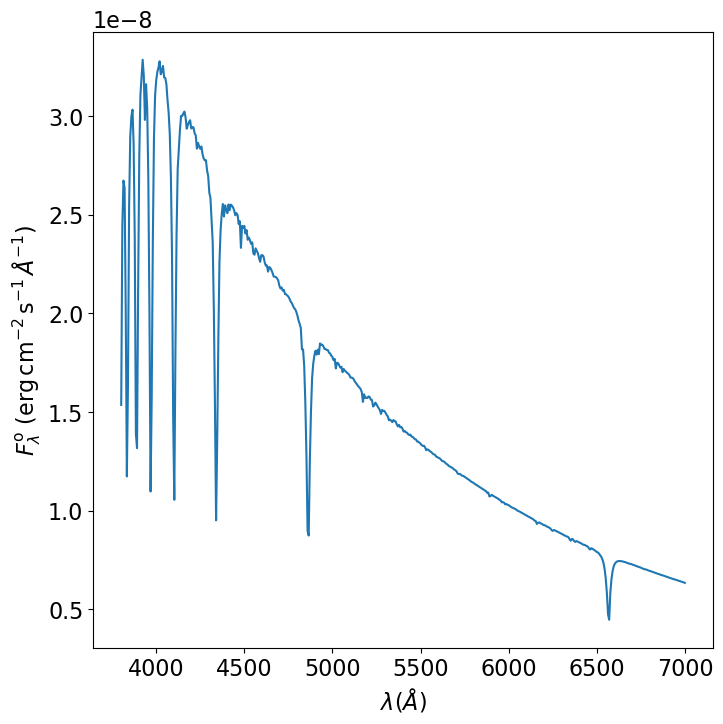

In [6]:
# Evaluate the observed flux

F_obs = (R/d)**2*specgrid.flux(x, z, lam)

# Plot

plt.figure(figsize=[8,8])
plt.plot(lam_c, F_obs)

plt.xlabel(r'$\lambda ({\AA})$')
plt.ylabel(r'$F^{\mathrm{o}}_{\lambda}\ ({\rm erg\,cm^{-2}\,s^{-1}}\,\AA^{-1})$')

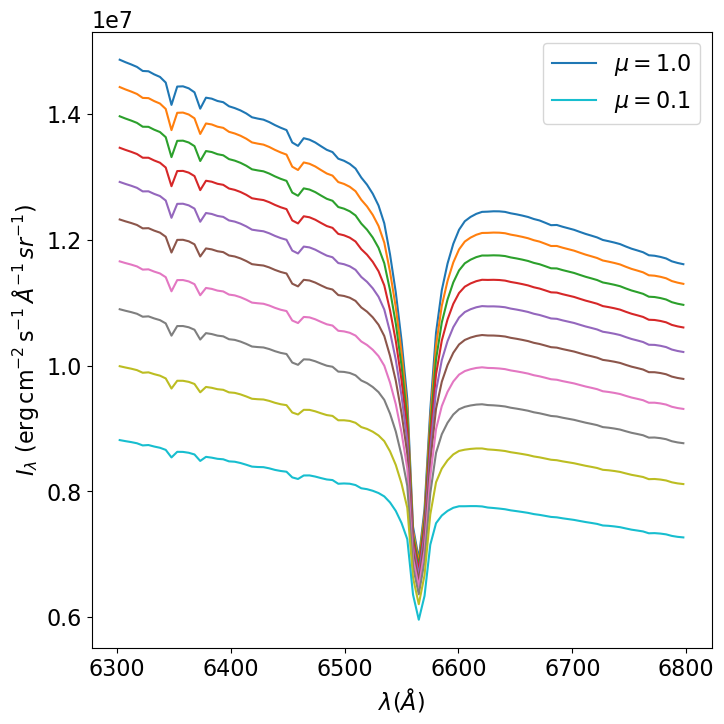

In [7]:
# Set up the wavelength abscissa

lam_min = 6300.
lam_max = 6800.

lam = np.linspace(lam_min, lam_max, 100)

lam_c = 0.5*(lam[1:] + lam[:-1])

# Loop over mu

plt.figure(figsize=[8,8])

for mu in np.linspace(1.0, 0.1, 10):

    # Evaluate the intensity

    I = specgrid.intensity(x, mu, z, lam)

    # Plot

    if mu==0.1 or mu==1.0:
        label=r'$\mu={:3.1f}$'.format(mu)
    else:
        label=None

    plt.plot(lam_c, I, label=label)

plt.xlabel(r'$\lambda ({\AA})$')
plt.ylabel(r'$I_{\lambda}\ ({\rm erg\,cm^{-2}\,s^{-1}}\,\AA^{-1}\,sr^{-1})$')

plt.legend()

In [8]:
# Load the PhotGrids

PASS_DIR = os.path.join(MSG_DIR, 'data', 'passbands')
filters = ['U', 'B', 'V']

photgrids = {}

for filter in filters:
    passband_file_name = os.path.join(PASS_DIR, f'pb-Generic-Johnson.{filter}-Vega.h5')
    photgrids[filter] = pymsg.PhotGrid(specgrid_file_name, passband_file_name)

In [9]:
# Evaluate the observed fluxes (each normalized to the passband
# zero-point flux)

F_obs = {}

for filter in filters:
    F_obs[filter] = (R/d)**2*photgrids[filter].flux(x)

In [10]:
# Evaluate apparent magnitudes and print out magnitude & colors

mags = {}

for filter in filters:
    mags[filter] = -2.5*np.log10(F_obs[filter])

print(f"V={mags['V']}, U-B={mags['U']-mags['B']}, B-V={mags['B']-mags['V']}")

V=-1.4466779855804999, U-B=-0.059646818350376885, B-V=0.0011219345596131802
